In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [81]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [82]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [85]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [86]:
class_counts = df['Class'].value_counts()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

In [87]:
class_percentages = df['Class'].value_counts(normalize=True) * 100
class_percentages

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [88]:
df.duplicated().sum()

1081

In [89]:
df.shape

(284807, 31)

In [90]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Distributions**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


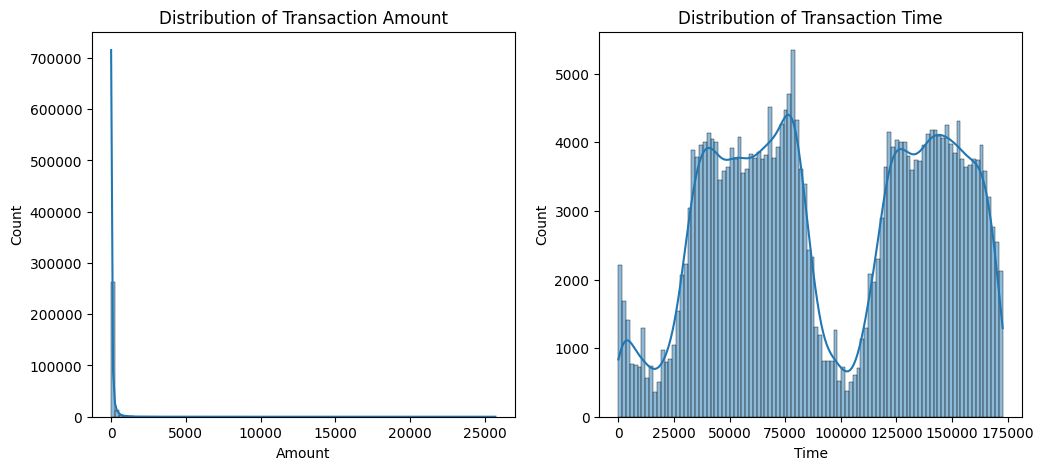

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.histplot(df['Amount'], bins=100, ax=ax1, kde=True)
ax1.set_title('Distribution of Transaction Amount')
sns.histplot(df['Time'], bins=100, ax=ax2, kde=True)
ax2.set_title('Distribution of Transaction Time')
plt.show()

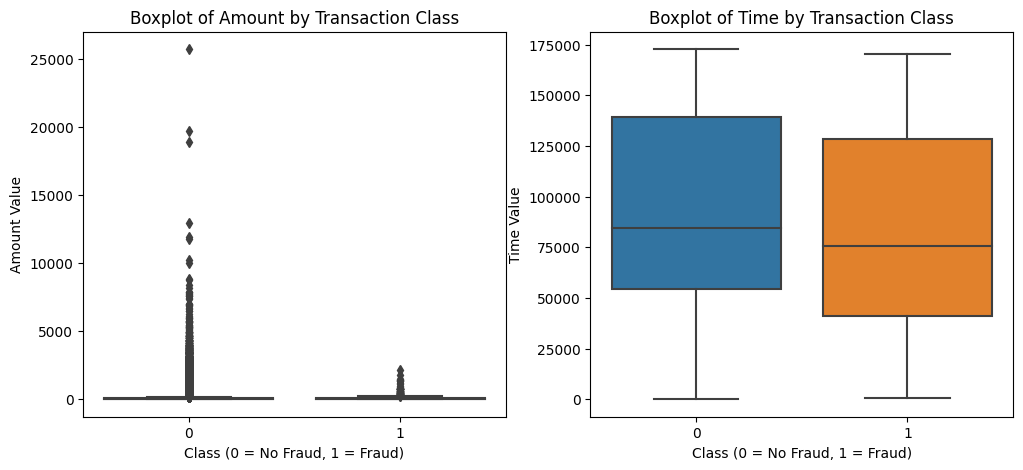

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# --- Plot 1: Amount ---
sns.boxplot(x='Class', y='Amount', data=df, ax=ax1)
ax1.set_title('Boxplot of Amount by Transaction Class')
ax1.set_ylabel('Amount Value')
ax1.set_xlabel('Class (0 = No Fraud, 1 = Fraud)') 

# --- Plot 2: Time ---
sns.boxplot(x='Class', y='Time', data=df, ax=ax2)
ax2.set_title('Boxplot of Time by Transaction Class')
ax2.set_ylabel('Time Value')
ax2.set_xlabel('Class (0 = No Fraud, 1 = Fraud)')

plt.show()

/tmp/ipykernel_171/494867553.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Class 0 (No Fraud)', shade=True, ax=ax1)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_171/494867553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Class 1 (Fraud)', shade=True, ax=ax1)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf v

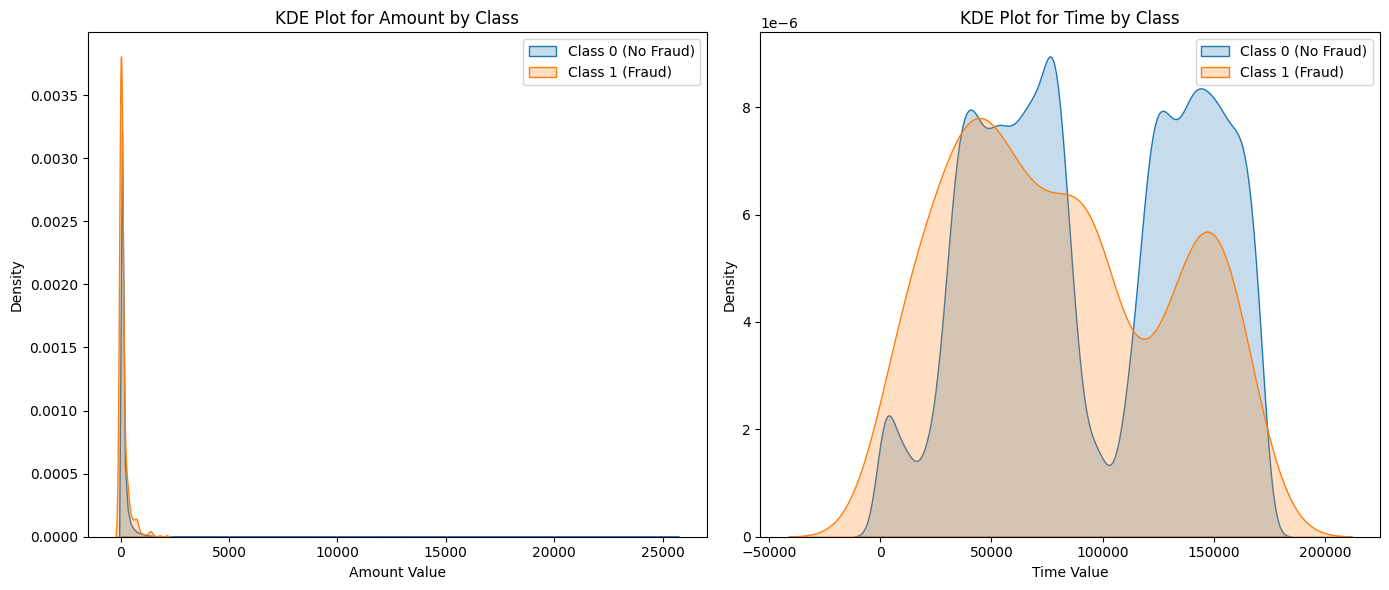

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# --- Plot 1: Amount Distribution ---
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Class 0 (No Fraud)', shade=True, ax=ax1)
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Class 1 (Fraud)', shade=True, ax=ax1)
ax1.set_title('KDE Plot for Amount by Class')
ax1.set_xlabel('Amount Value')
ax1.legend()

# --- Plot 2: Time Distribution ---
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Class 0 (No Fraud)', shade=True, ax=ax2)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Class 1 (Fraud)', shade=True, ax=ax2)
ax2.set_title('KDE Plot for Time by Class')
ax2.set_xlabel('Time Value')
ax2.legend()

plt.tight_layout()
plt.show()

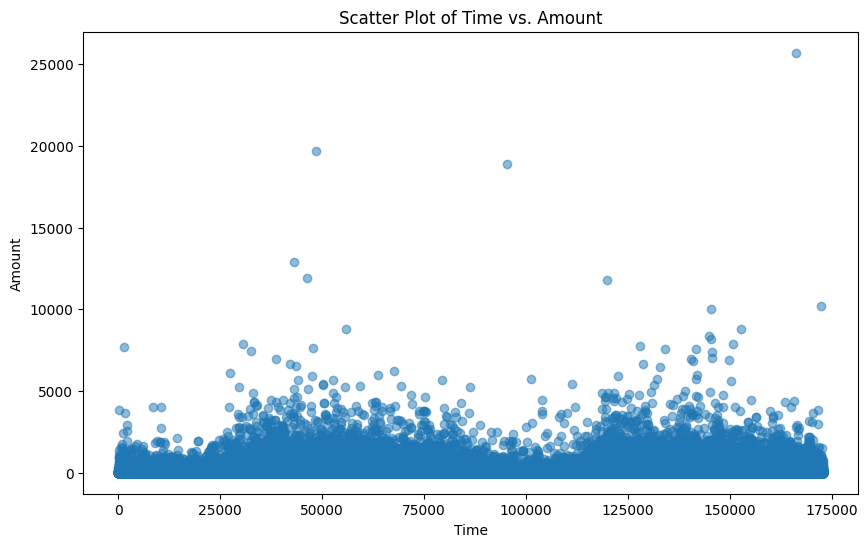

In [94]:
plt.figure(figsize=(10, 6))

# Added alpha=0.1 to help with overplotting
plt.scatter(df['Time'], df['Amount'], alpha=0.5)

# Add labels and title
plt.xlabel('Time') # Corrected label
plt.ylabel('Amount') # Corrected label
plt.title('Scatter Plot of Time vs. Amount')

# Save the plot
plt.savefig('direct_correction_scatter.png')

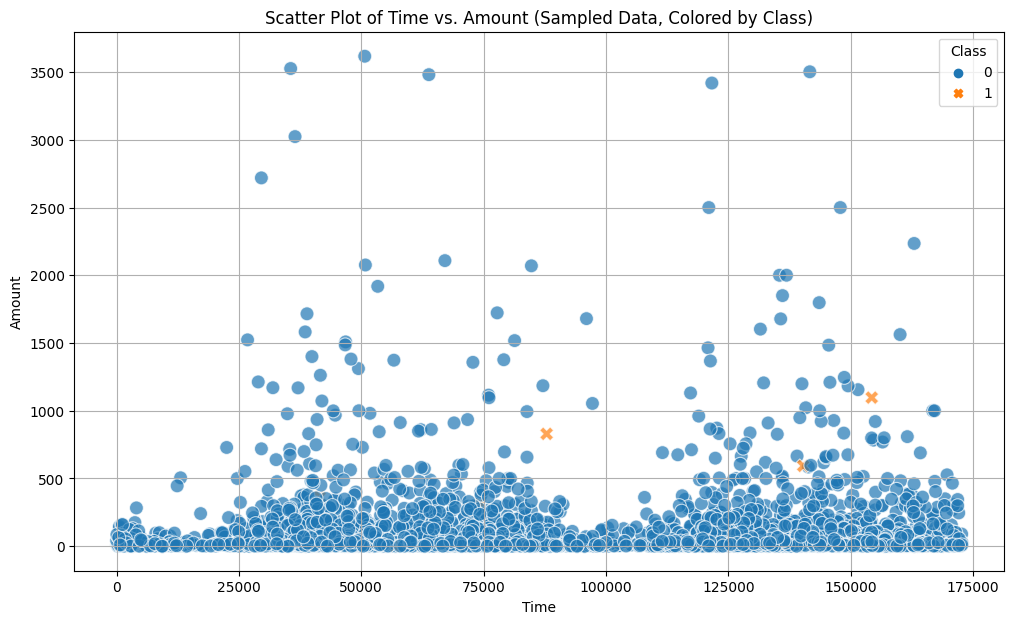

In [95]:
df_sample = df.sample(n=5000, random_state=42)

plt.figure(figsize=(12, 7))

# Use seaborn.scatterplot for easy 'hue' integration
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df_sample, 
                style='Class', s=100, alpha=0.7)
                
plt.title('Scatter Plot of Time vs. Amount (Sampled Data, Colored by Class)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.grid(True)

# Save the plot
plt.savefig('improved_seaborn_scatter.png')

# **Train Test Split**

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1),
                                                    df['Class'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

# **Scalling**

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,53150.0,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,12.95
40018,40060.0,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,25.57
250360,154865.0,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,6.90
234820,148130.0,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,4.55
10001,15014.0,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [99]:
X_train_scaled

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [100]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [101]:
X_train_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.877510,-0.571779,0.628284,0.529475,-0.749479,0.025137,0.644192,-0.500959,-2.679209,1.400009,...,-0.845458,4.094571,-0.742969,0.053657,-1.281474,0.202898,-0.892783,0.573778,-0.219661,-0.305116
1,-1.153085,0.626792,-0.083622,0.313696,-0.118269,-0.330793,-0.142567,-0.289639,0.041441,0.117241,...,0.040144,-0.233752,-0.791286,0.059559,-0.503033,0.140397,1.682652,-0.170915,0.006314,-0.254237
2,1.263832,0.983612,-0.119873,-0.188282,1.126637,-0.356708,-0.233994,-0.247117,0.030587,1.183060,...,-0.466730,-0.716790,-1.722299,0.731669,-0.200271,-0.694476,-2.279759,0.132840,-0.101283,-0.329508
3,1.122044,1.045028,0.119454,-1.124173,0.373420,0.131198,-1.087195,0.208774,-0.302279,0.548164,...,-0.285042,0.272289,1.041614,-0.021385,-0.132182,0.450457,-0.202445,0.001499,-0.098331,-0.338982
4,-1.680363,-0.429614,0.627754,1.540937,2.190580,0.169007,0.378586,0.256827,-0.132910,0.372422,...,-0.178221,-0.493641,-0.630795,0.263811,0.385747,-0.804336,-0.152495,-0.883401,-0.528391,-0.342046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,0.918446,-0.677611,0.690783,-0.620039,0.108044,0.081639,-0.405449,0.400280,0.427307,-0.448936,...,-0.573605,-0.017685,-0.327236,0.014427,-1.269741,-0.762918,0.657678,-1.152365,-0.032593,-0.156187
227841,-0.708733,-0.322586,0.557449,0.976814,0.149708,0.684801,0.951840,0.412272,0.336495,-0.854317,...,0.113098,-0.069988,-0.006255,0.145747,-1.594811,-1.003171,0.616915,0.365011,0.344617,-0.256575
227842,-0.383495,0.772108,-0.574999,-0.143620,-1.157886,-0.625666,-0.350544,-0.545805,-0.111328,-2.076719,...,-0.367122,-0.757967,-1.895602,0.129552,-0.958583,0.571505,-1.026645,-0.002097,0.011848,-0.216622
227843,0.050963,0.918514,-1.029852,-0.092876,-0.438212,-1.148302,0.063557,-1.225456,0.147363,1.595977,...,0.188688,0.246271,0.483083,0.186035,-0.936572,-1.145070,-0.611211,-0.082318,-0.100812,0.333336


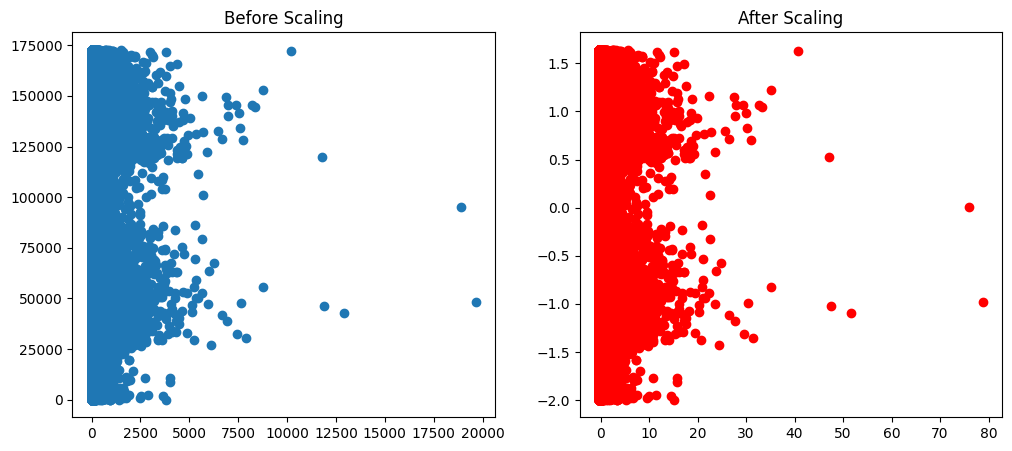

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Amount'], X_train['Time'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Amount'], X_train_scaled['Time'],color='red')
ax2.set_title("After Scaling")
plt.show()

Saved 'boxplot_before_after_scaling.png'

Note: The 'Before' plot's Y-axis is dominated by 'Amount'.
The 'After' plot shows all features on a similar scale.


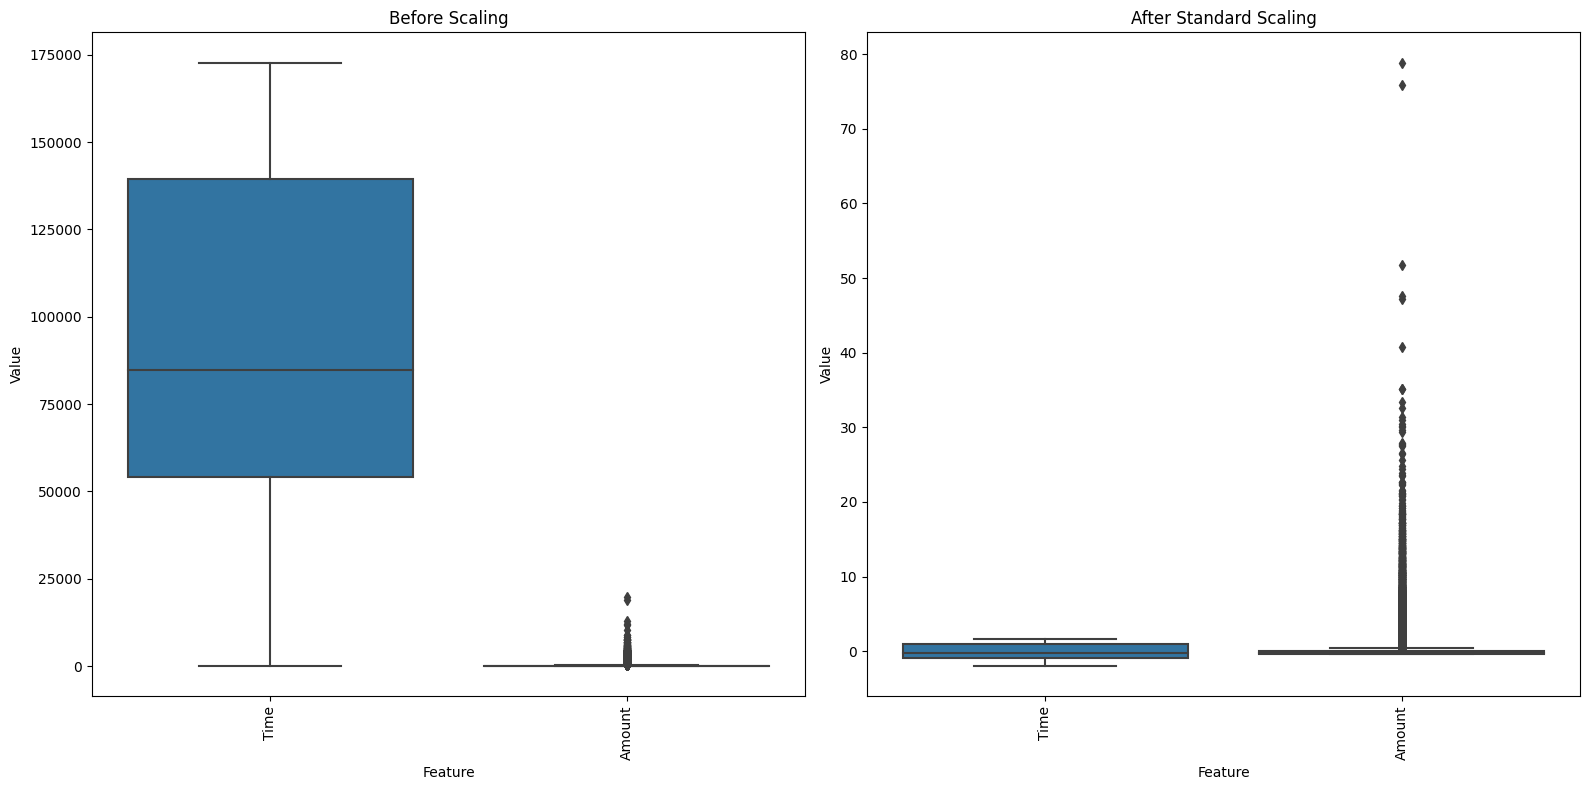

In [103]:
# --- 5. Create Boxplots ---
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

    # --- Before Scaling ---
ax1.set_title('Before Scaling')
sns.boxplot(data=X_train[['Time','Amount']], ax=ax1)
ax1.set_xlabel('Feature')
ax1.set_ylabel('Value')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90) 

    # --- After Scaling ---
ax2.set_title('After Standard Scaling')
sns.boxplot(data=X_train_scaled[['Time','Amount']], ax=ax2)
ax2.set_xlabel('Feature')
ax2.set_ylabel('Value')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90) 

    # --- Save and Show ---
plt.tight_layout() # Adjust plots to prevent overlap
plt.savefig('boxplot_before_after_scaling.png')
print("Saved 'boxplot_before_after_scaling.png'")
print("\nNote: The 'Before' plot's Y-axis is dominated by 'Amount'.")
print("The 'After' plot shows all features on a similar scale.")

/tmp/ipykernel_171/2852305265.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train['Time'], ax=axes[0, 0], shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_171/2852305265.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_scaled['Time'], ax=axes[0, 1], shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

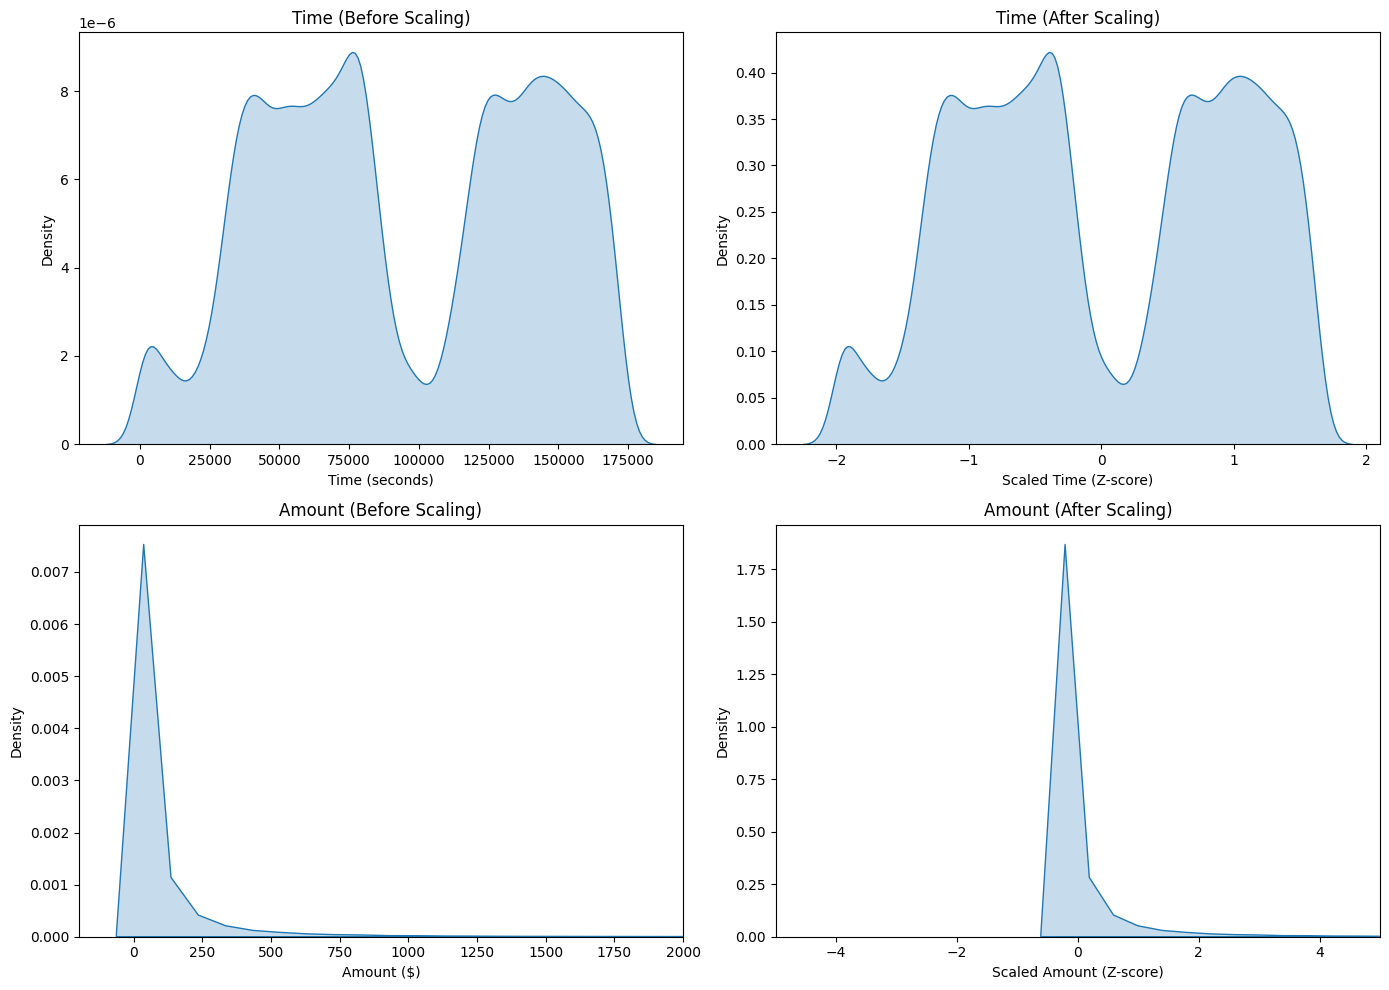

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Create a 2x2 Plot Grid ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# --- 1. Time (Before Scaling) ---
sns.kdeplot(X_train['Time'], ax=axes[0, 0], shade=True)
axes[0, 0].set_title('Time (Before Scaling)')
axes[0, 0].set_xlabel('Time (seconds)')
axes[0, 0].set_ylabel('Density')

# --- 2. Time (After Scaling) ---
sns.kdeplot(X_train_scaled['Time'], ax=axes[0, 1], shade=True)
axes[0, 1].set_title('Time (After Scaling)')
axes[0, 1].set_xlabel('Scaled Time (Z-score)')
axes[0, 1].set_ylabel('Density')

# --- 3. Amount (Before Scaling) ---
sns.kdeplot(X_train['Amount'], ax=axes[1, 0], shade=True)
axes[1, 0].set_title('Amount (Before Scaling)')
axes[1, 0].set_xlabel('Amount ($)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_xlim(-200, 2000) # Zoom in to see the main distribution

# --- 4. Amount (After Scaling) ---
sns.kdeplot(X_train_scaled['Amount'], ax=axes[1, 1], shade=True)
axes[1, 1].set_title('Amount (After Scaling)')
axes[1, 1].set_xlabel('Scaled Amount (Z-score)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_xlim(-5, 5) # Zoom in to see the main distribution

plt.tight_layout() # Prevents plots from overlapping
plt.show()

# **Balance Imbalance Data**

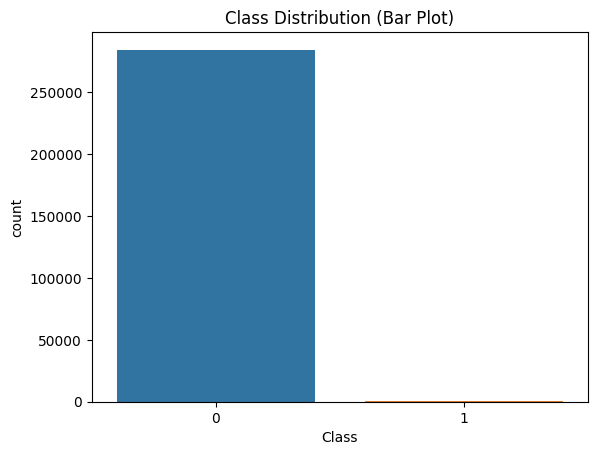

In [105]:
sns.countplot(x=df['Class'])
plt.title("Class Distribution (Bar Plot)")
plt.show()


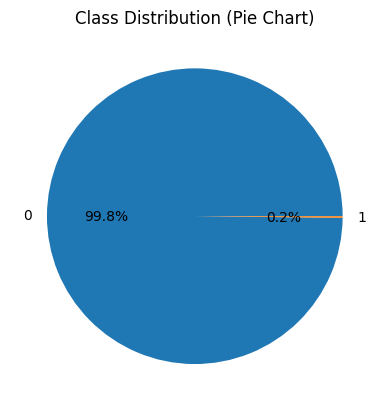

In [106]:
df['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Class Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


In [107]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

# **OverSampling**

Original training dataset shape: Counter({0: 227454, 1: 391})
Resampled training dataset shape: Counter({0: 227454, 1: 227454})

Visualizing the balanced training data:


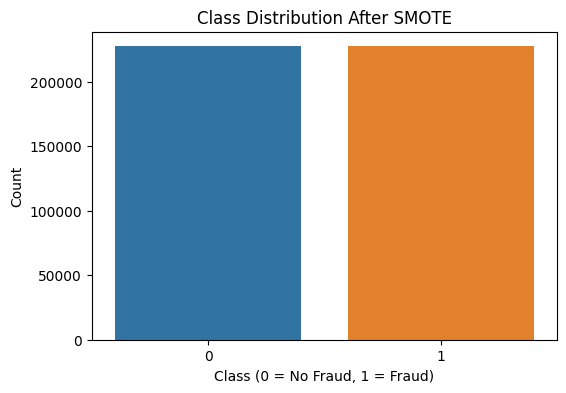

In [108]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# We use your 'y_train' to see the shape before balancing
print(f"Original training dataset shape: {Counter(y_train)}")

# Define SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your scaled training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Show the new, balanced shape
print(f"Resampled training dataset shape: {Counter(y_train_resampled)}")

# --- Optional: Visualize the new balanced data ---
print("\nVisualizing the balanced training data:")
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# **Models with OverSampling**

Training Logistic Regression model...
Model trained successfully.
------------------------------
** Logistic Regression AUPRC: 0.7670 **
This is your most important metric!
------------------------------

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99     56861
    Fraud (1)       0.06      0.94      0.12       101

     accuracy                           0.97     56962
    macro avg       0.53      0.96      0.55     56962
 weighted avg       1.00      0.97      0.99     56962

------------------------------

Confusion Matrix (Logistic Regression):


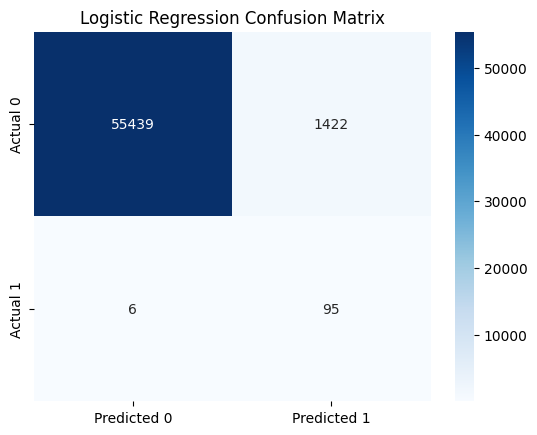

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Initialize and Train the Model ---
model_lr = LogisticRegression(random_state=42, max_iter=1000)
print("Training Logistic Regression model...")
model_lr.fit(X_train_resampled, y_train_resampled)
print("Model trained successfully.")
print("-" * 30)

# --- 2. Make Predictions ---
predictions_lr = model_lr.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_lr = average_precision_score(y_test, probs_lr)
print(f"** Logistic Regression AUPRC: {auprc_lr:.4f} **")
print("This is your most important metric!")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, predictions_lr, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Training KNN model... (This may take a few minutes)
Model trained successfully in 0.11 seconds.
------------------------------
Making predictions with KNN... (This may also be slow)
Predictions made in 179.78 seconds.
------------------------------
** KNN AUPRC: 0.6450 **
------------------------------

Classification Report (KNN):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56861
    Fraud (1)       0.50      0.87      0.63       101

     accuracy                           1.00     56962
    macro avg       0.75      0.93      0.82     56962
 weighted avg       1.00      1.00      1.00     56962

------------------------------

Confusion Matrix (KNN):


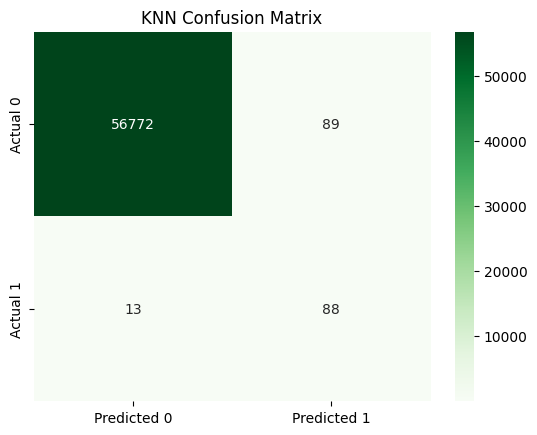

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

# --- 1. Initialize and Train the Model ---
model_knn = KNeighborsClassifier(n_neighbors=5)
print("Training KNN model... (This may take a few minutes)")
start_time = time.time()

model_knn.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
print(f"Model trained successfully in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 2. Make Predictions ---
print("Making predictions with KNN... (This may also be slow)")
start_time = time.time()
predictions_knn = model_knn.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
end_time = time.time()
print(f"Predictions made in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_knn = average_precision_score(y_test, probs_knn)
print(f"** KNN AUPRC: {auprc_knn:.4f} **")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (KNN):")
print(classification_report(y_test, predictions_knn, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (KNN):")
cm_knn = confusion_matrix(y_test, predictions_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN Confusion Matrix')
plt.show()

Training Gaussian Naive Bayes model...
Model trained successfully in 0.35 seconds.
------------------------------
Making predictions with Naive Bayes...
Predictions made in 0.07 seconds.
------------------------------
** Gaussian Naive Bayes AUPRC: 0.0894 **
------------------------------

Classification Report (Gaussian Naive Bayes):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56861
    Fraud (1)       0.06      0.88      0.11       101

     accuracy                           0.98     56962
    macro avg       0.53      0.93      0.55     56962
 weighted avg       1.00      0.98      0.99     56962

------------------------------

Confusion Matrix (Gaussian Naive Bayes):


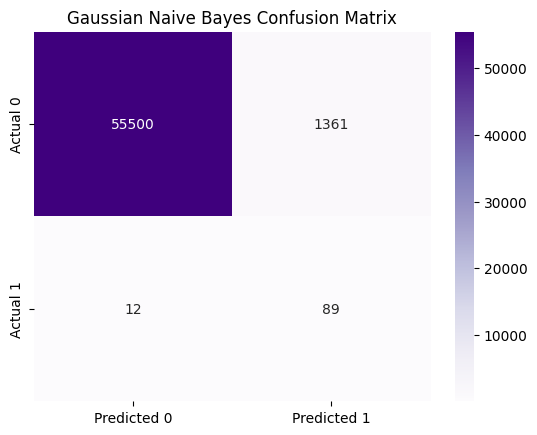

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

# --- 1. Initialize and Train the Model ---
model_nb = GaussianNB()
print("Training Gaussian Naive Bayes model...")
start_time = time.time()

model_nb.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
print(f"Model trained successfully in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 2. Make Predictions ---
print("Making predictions with Naive Bayes...")
start_time = time.time()
predictions_nb = model_nb.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_nb = model_nb.predict_proba(X_test_scaled)[:, 1]
end_time = time.time()
print(f"Predictions made in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_nb = average_precision_score(y_test, probs_nb)
print(f"** Gaussian Naive Bayes AUPRC: {auprc_nb:.4f} **")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, predictions_nb, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (Gaussian Naive Bayes):")
cm_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

Training Random Forest model...
Model trained successfully in 222.92 seconds.
------------------------------
Making predictions with Random Forest...
Predictions made in 0.52 seconds.
------------------------------
** Random Forest AUPRC: 0.8655 **
------------------------------

Classification Report (Random Forest):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56861
    Fraud (1)       0.87      0.84      0.85       101

     accuracy                           1.00     56962
    macro avg       0.93      0.92      0.93     56962
 weighted avg       1.00      1.00      1.00     56962

------------------------------

Confusion Matrix (Random Forest):


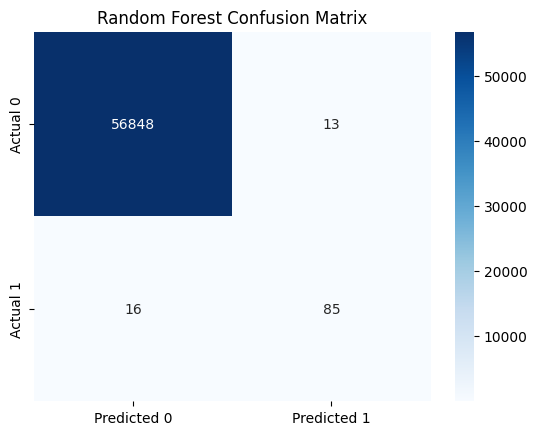

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

# --- 1. Initialize and Train the Model ---
model_rf_simple = RandomForestClassifier(
    random_state=42, 
    n_jobs=-1,        
    max_depth=8,      
    min_samples_leaf=10  
)
print("Training Random Forest model...")
start_time = time.time()

model_rf.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
print(f"Model trained successfully in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 2. Make Predictions ---
print("Making predictions with Random Forest...")
start_time = time.time()
predictions_rf = model_rf.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
end_time = time.time()
print(f"Predictions made in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_rf = average_precision_score(y_test, probs_rf)
print(f"** Random Forest AUPRC: {auprc_rf:.4f} **")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, predictions_rf, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.show()

# **UnderSampling**

Original training dataset shape: Counter({0: 227454, 1: 391})
Resampled training dataset shape: Counter({0: 391, 1: 391})

Visualizing the balanced training data:


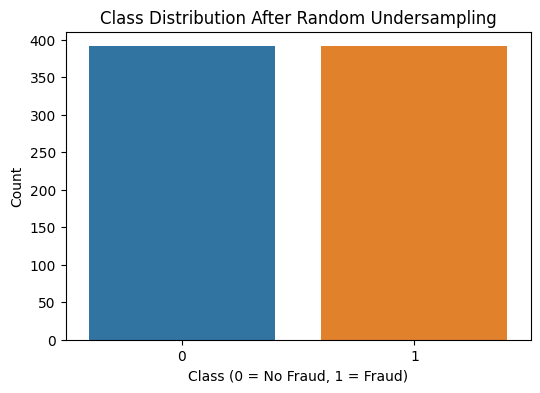

In [113]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Original training dataset shape: {Counter(y_train)}")

# Define RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to your scaled training data
X_train_resampled_under, y_train_resampled_under = rus.fit_resample(X_train_scaled, y_train)

# Show the new, balanced shape
print(f"Resampled training dataset shape: {Counter(y_train_resampled_under)}")

# --- Optional: Visualize the new balanced data ---
print("\nVisualizing the balanced training data:")
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled_under)
plt.title('Class Distribution After Random Undersampling')
plt.xlabel('Class (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# **Models with UnderSampling**

Training Random Forest model...
Model trained successfully in 0.38 seconds.
------------------------------
Making predictions with Random Forest...
Predictions made in 0.29 seconds.
------------------------------
** Random Forest AUPRC: 0.7500 **
------------------------------

Classification Report (Random Forest):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99     56861
    Fraud (1)       0.05      0.91      0.10       101

     accuracy                           0.97     56962
    macro avg       0.53      0.94      0.54     56962
 weighted avg       1.00      0.97      0.98     56962

------------------------------

Confusion Matrix (Random Forest):


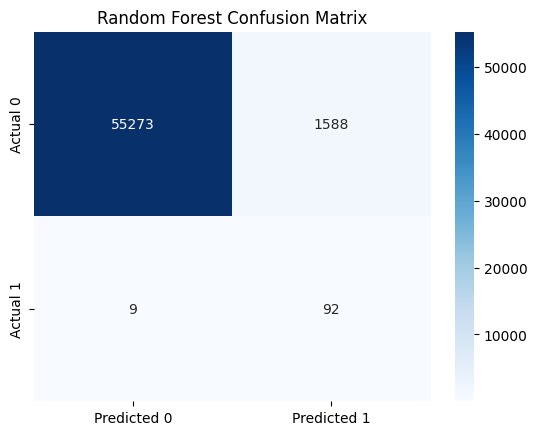

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time


# --- 1. Initialize and Train the Model ---
model_rf_simple = RandomForestClassifier(
    random_state=42, 
    n_jobs=-1,        
    max_depth=8,       
    min_samples_leaf=10 
)
print("Training Random Forest model...")
start_time = time.time()

model_rf.fit(X_train_resampled_under, y_train_resampled_under)
end_time = time.time()
print(f"Model trained successfully in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 2. Make Predictions ---
print("Making predictions with Random Forest...")
start_time = time.time()
predictions_rf = model_rf.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
end_time = time.time()
print(f"Predictions made in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 3. Evaluate the Model ---

# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_rf = average_precision_score(y_test, probs_rf)
print(f"** Random Forest AUPRC: {auprc_rf:.4f} **")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, predictions_rf, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.show()

Training Gaussian Naive Bayes model...
Model trained successfully in 0.01 seconds.
------------------------------
Making predictions with Naive Bayes...
Predictions made in 0.07 seconds.
------------------------------
** Gaussian Naive Bayes AUPRC: 0.0629 **
------------------------------

Classification Report (Gaussian Naive Bayes):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.98     56861
    Fraud (1)       0.04      0.87      0.08       101

     accuracy                           0.97     56962
    macro avg       0.52      0.92      0.53     56962
 weighted avg       1.00      0.97      0.98     56962

------------------------------

Confusion Matrix (Gaussian Naive Bayes):


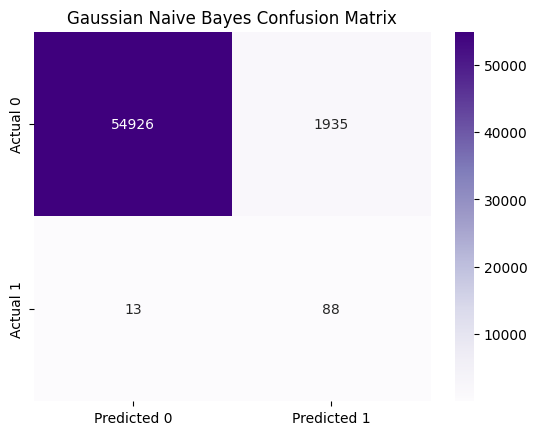

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

# --- 1. Initialize and Train the Model ---
model_nb = GaussianNB()
print("Training Gaussian Naive Bayes model...")
start_time = time.time()

model_nb.fit(X_train_resampled_under, y_train_resampled_under)
end_time = time.time()
print(f"Model trained successfully in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 2. Make Predictions ---
print("Making predictions with Naive Bayes...")
start_time = time.time()
predictions_nb = model_nb.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_nb = model_nb.predict_proba(X_test_scaled)[:, 1]
end_time = time.time()
print(f"Predictions made in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_nb = average_precision_score(y_test, probs_nb)
print(f"** Gaussian Naive Bayes AUPRC: {auprc_nb:.4f} **")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, predictions_nb, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (Gaussian Naive Bayes):")
cm_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

Training KNN model... (This may take a few minutes)
Model trained successfully in 0.00 seconds.
------------------------------
Making predictions with KNN... (This may also be slow)
Predictions made in 3.08 seconds.
------------------------------
** KNN AUPRC: 0.2036 **
------------------------------

Classification Report (KNN):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99     56861
    Fraud (1)       0.06      0.88      0.10       101

     accuracy                           0.97     56962
    macro avg       0.53      0.93      0.55     56962
 weighted avg       1.00      0.97      0.98     56962

------------------------------

Confusion Matrix (KNN):


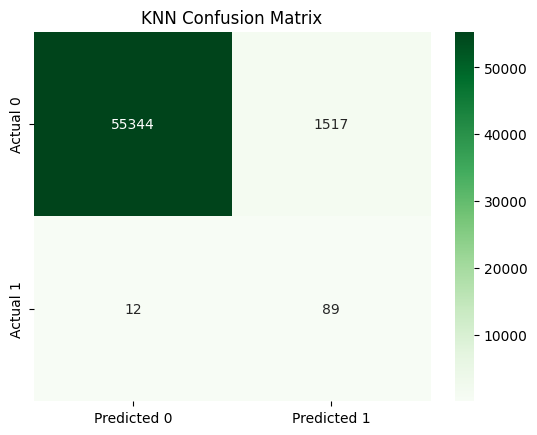

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

# --- 1. Initialize and Train the Model ---
model_knn = KNeighborsClassifier(n_neighbors=5)
print("Training KNN model... (This may take a few minutes)")
start_time = time.time()

model_knn.fit(X_train_resampled_under, y_train_resampled_under)
end_time = time.time()
print(f"Model trained successfully in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 2. Make Predictions ---
print("Making predictions with KNN... (This may also be slow)")
start_time = time.time()
predictions_knn = model_knn.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
end_time = time.time()
print(f"Predictions made in {end_time - start_time:.2f} seconds.")
print("-" * 30)

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_knn = average_precision_score(y_test, probs_knn)
print(f"** KNN AUPRC: {auprc_knn:.4f} **")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (KNN):")
print(classification_report(y_test, predictions_knn, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (KNN):")
cm_knn = confusion_matrix(y_test, predictions_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN Confusion Matrix')
plt.show()

Training Logistic Regression model...
Model trained successfully.
------------------------------
** Logistic Regression AUPRC: 0.5723 **
This is your most important metric!
------------------------------

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.98     56861
    Fraud (1)       0.05      0.96      0.10       101

     accuracy                           0.97     56962
    macro avg       0.53      0.96      0.54     56962
 weighted avg       1.00      0.97      0.98     56962

------------------------------

Confusion Matrix (Logistic Regression):


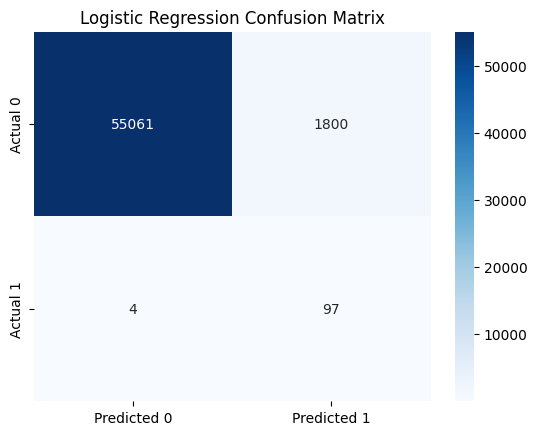

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc

# --- 1. Initialize and Train the Model ---
model_lr = LogisticRegression(random_state=42, max_iter=1000)
print("Training Logistic Regression model...")
model_lr.fit(X_train_resampled_under, y_train_resampled_under)
print("Model trained successfully.")
print("-" * 30)

# --- 2. Make Predictions ---
predictions_lr = model_lr.predict(X_test_scaled)
# Get probabilities for the AUPRC score
probs_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# --- 3. Evaluate the Model ---
# A. AUPRC (Area Under the Precision-Recall Curve)
auprc_lr = average_precision_score(y_test, probs_lr)
print(f"** Logistic Regression AUPRC: {auprc_lr:.4f} **")
print("This is your most important metric!")
print("-" * 30)

# B. Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, predictions_lr, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)

# C. Confusion Matrix
print("\nConfusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# **ROC Curve & AUC Score**

Training Logistic Regression...
Training Random Forest...
Training Naive Bayes...
Training K-Nearest Neighbors...


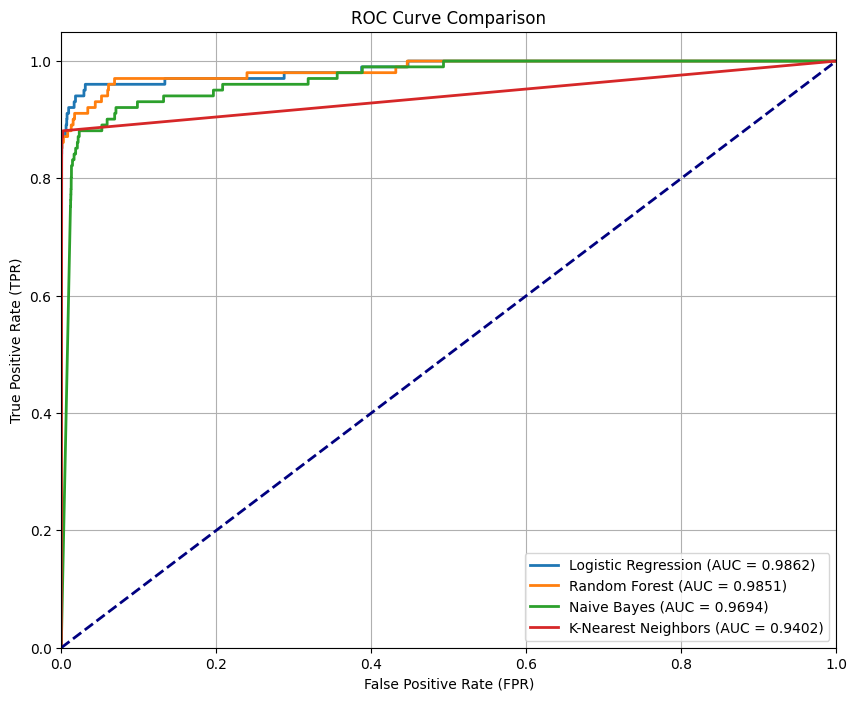


--- Model AUC Scores ---
Logistic Regression: AUC - ROC = 0.9862
Random Forest: AUC - ROC = 0.9851
Naive Bayes: AUC - ROC = 0.9694
K-Nearest Neighbors: AUC - ROC = 0.9402


In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- Import all the models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Define the models ---
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=8, min_samples_leaf=10),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

roc_auc_scores = {}

# --- 2. Plot the ROC curves ---
plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})') # Changed to 4 decimal places

# --- 3. Customize the plot ---
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- 4. Print the scores ---
print("\n--- Model AUC Scores ---")
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.4f}')
